In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control


In [149]:
b = 1;
c = 0.08;
lamb = 70*np.pi/180;#lambda
Rrw = 0.35;
Rfw = 0.35;
m = 87+2+1.5+1.5;
g = 9.81;
a = (87*0.492 + 2*0.866)/m;
h = (87*1.028 + 2*0.676 + 1.5*Rrw + 1.5*Rfw)/m;
J = 3.28 + .08 + .07 + .07;
D = .603 - .02;
tf = control.TransferFunction;

# Part b
## Simple Second-Order Models

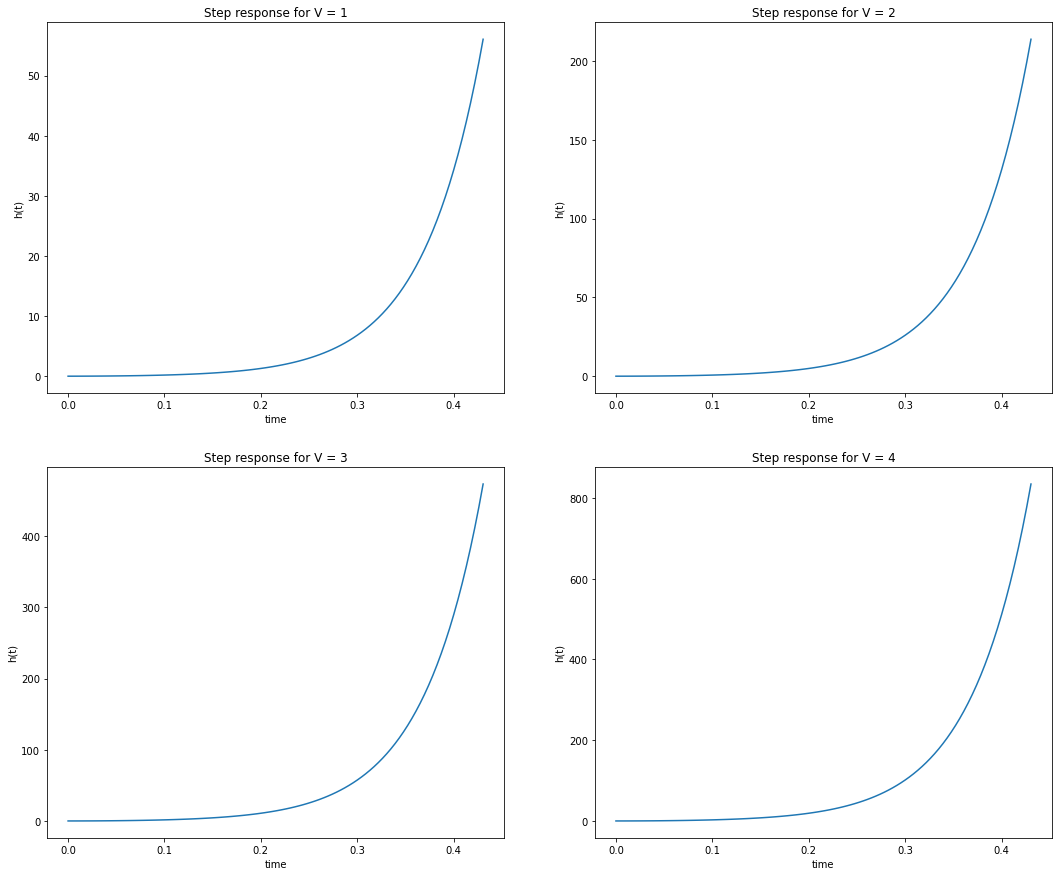

In [150]:
V = [1, 2, 3, 4];
plt.figure(figsize = (18, 15))
for i in range(len(V)):
    v = V[i];
    G1 = tf([v*D, m*h*v**2], [b*J, 0, -b*m*g*h]);
    [t, h1] = control.step_response(G1)
    plt.subplot(2,2,i+1);
    plt.plot(t,h1);
    plt.title('Step response for V = ' + str(v));
    plt.ylabel('h(t)');
    plt.xlabel('time');

## Simple second order model with a front fork

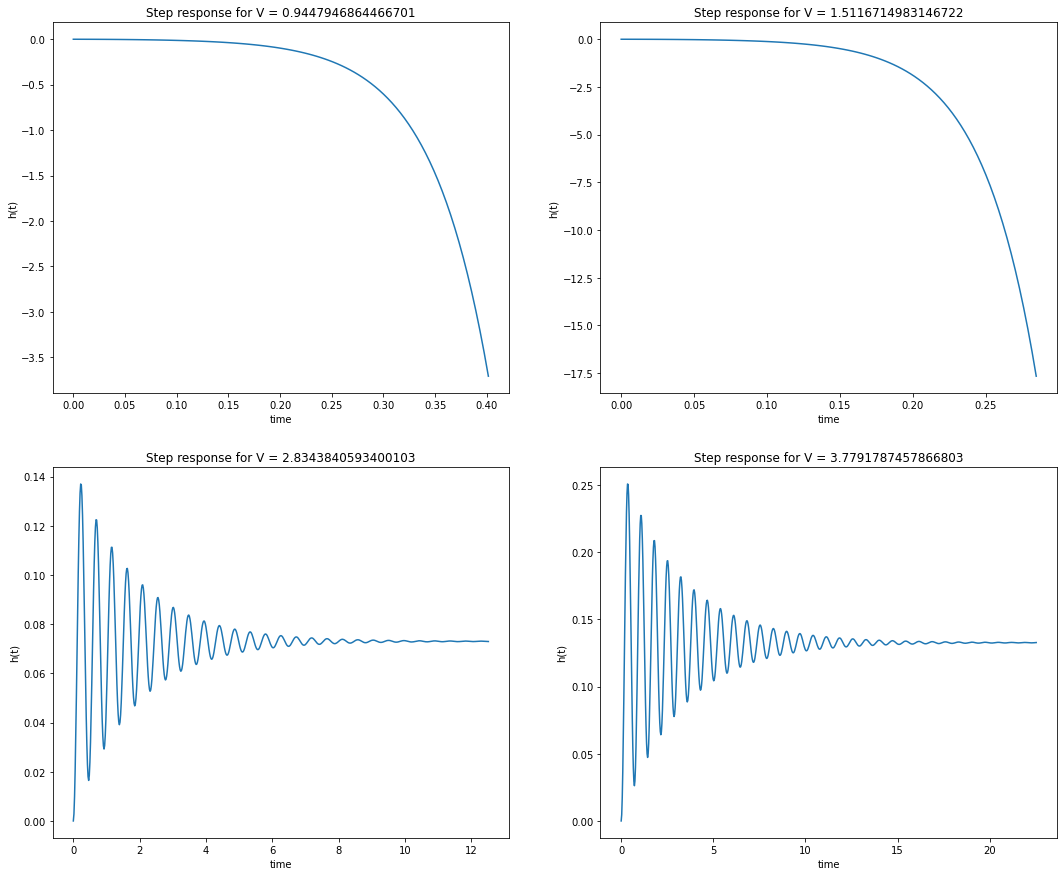

In [151]:
Vc = np.sqrt(b*g/np.tan(lamb));
V = [0.5*Vc, 0.8*Vc, 1.5*Vc, 2*Vc];
plt.figure(figsize = (18, 15))
for i in range(len(V)):
    v = V[i];
    numer = [D*v*b/(a*c*m)/(v**2*np.sin(lamb)-b*g*np.cos(lamb)), b*(h*v**2-a*c*g)/(a*c)/(v**2*np.sin(lamb)-b*g*np.cos(lamb))];
    denum = [J, D*v*g/(v**2*np.sin(lamb)-b*g*np.cos(lamb)), m*g**2*(b*h*np.cos(lamb)-a*c*np.sin(lamb))/(v**2*np.sin(lamb)-b*g*np.cos(lamb))];
    G2 = tf(numer,denum);
    [t, h2] = control.step_response(G2)
    plt.subplot(2,2,i+1);
    plt.plot(t,h2);
    plt.title('Step response for V = ' + str(v));
    plt.ylabel('h(t)');
    plt.xlabel('time');

## Bicycle with rear-wheel steering

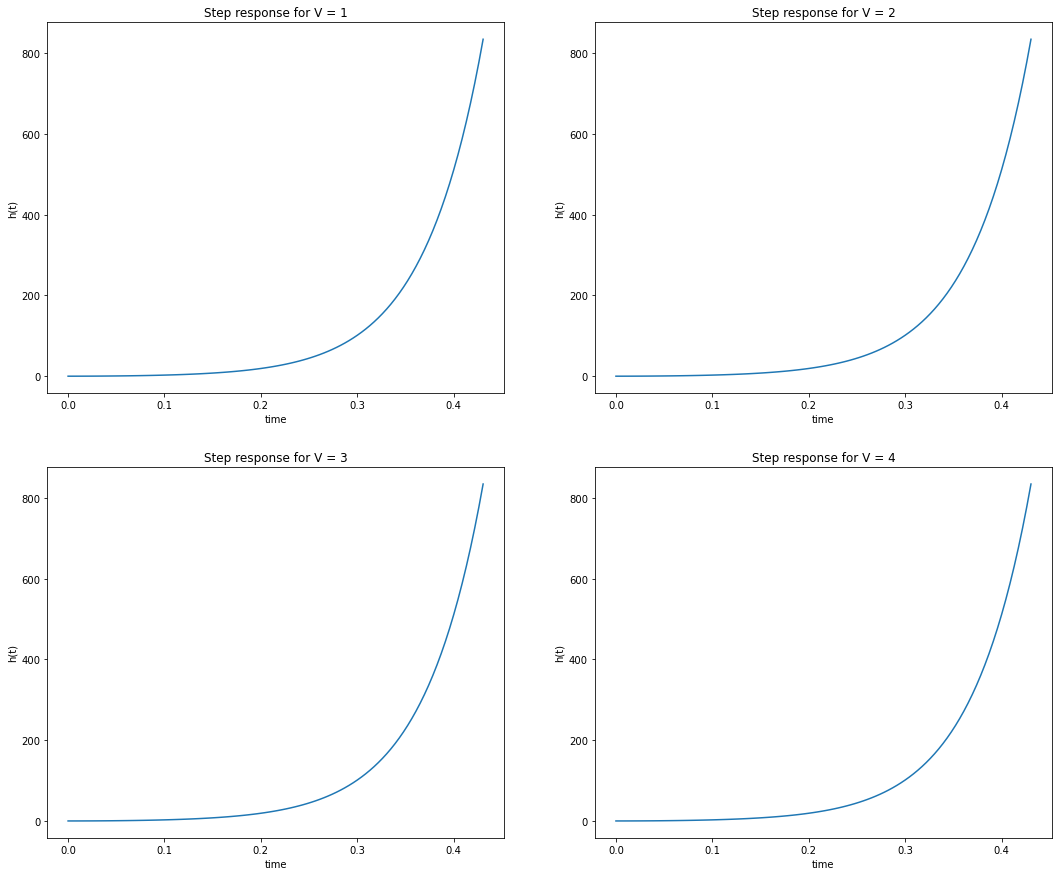

In [152]:
V = [1, 2, 3, 4];
plt.figure(figsize = (18, 15))
for i in range(len(V)):
    v = V[i];
    G3 = tf([-v*D, m*h*v**2], [b*J, 0, -b*m*g*h]);
    [t, h3] = control.step_response(G1)
    plt.subplot(2,2,i+1);
    plt.plot(t,h3);
    plt.title('Step response for V = ' + str(v));
    plt.ylabel('h(t)');
    plt.xlabel('time');

## Linear fourth-order model

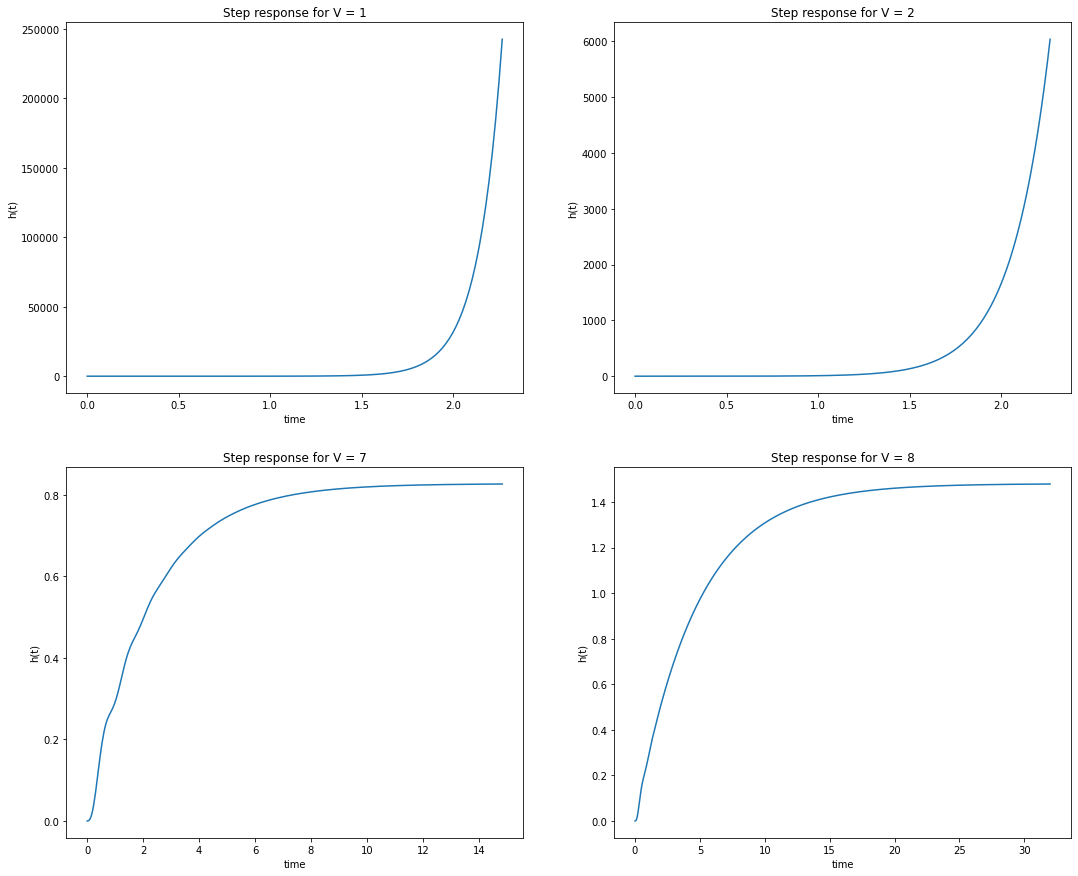

In [153]:
M = np.array([[96.8, -3.57],[-3.57, .258]]);
C = np.array([[0, -50.8],[.436, 2.2]]);
K0 = np.array([[-901, 35.17],[35.17, -12.03]]);
K2 = np.array([[0, -87.06],[0, 3.5]]);

V = [1, 2, 7, 8];
plt.figure(figsize = (18, 15))
for i in range(len(V)):
    v = V[i];
    T11 = tf([M[0,0], C[0,0]*v, K0[0,0]+K2[0,0]*v**2],[1]);
    T12 = tf([M[0,1], C[0,1]*v, K0[0,1]+K2[0,1]*v**2],[1]);
    T21 = tf([M[1,0], C[1,0]*v, K0[1,0]+K2[1,0]*v**2],[1]);
    T22 = tf([M[1,1], C[1,1]*v, K0[1,1]+K2[1,1]*v**2],[1]);
    G4 = 1/(T21 - T11*T22/T12);
    [t, h4] = control.step_response(G4)
    plt.subplot(2,2,i+1);
    plt.plot(t,h4);
    plt.title('Step response for V = ' + str(v));
    plt.ylabel('h(t)');
    plt.xlabel('time');

# Part C - stabilization scenario
## Simple second order model without a front fork

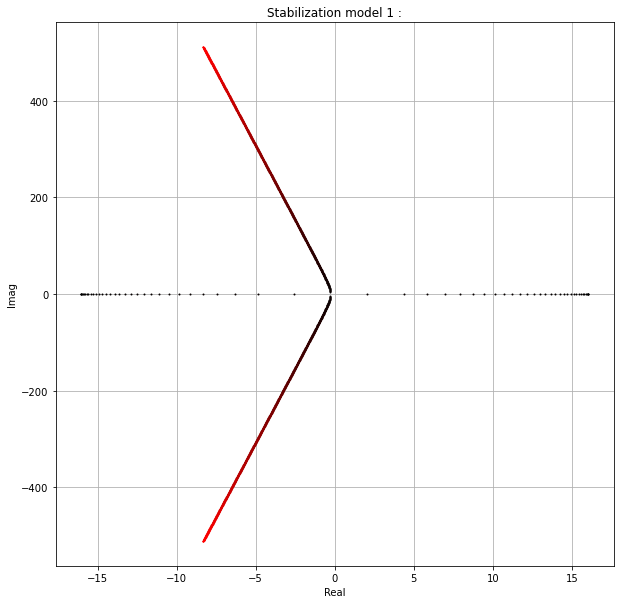

In [154]:
V = np.arange(0,100,0.1);
plt.figure(figsize = (10, 10))
k2 = 1;
for i in range(len(V)):
    v = V[i];
    T1 = tf([1], [J, D*v*k2/b, m*v**2*h*k2/b-m*g*h]);
    poles, zeros = control.pzmap(T1, plot=False)
    plt.plot(np.real(poles),np.imag(poles), marker='o', markersize=1, color=(i/len(V),0,0), ls='');
    plt.title('Stabilization model 1 :');
    plt.ylabel('Imag');
    plt.xlabel('Real');
    plt.grid(True);

## Simple second order model with a front fork

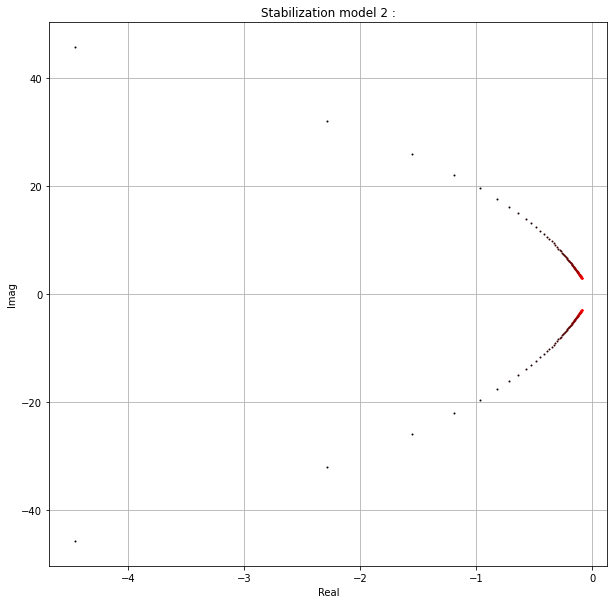

In [156]:
Vc = np.sqrt(b*g/np.tan(lamb));
#print(Vc);
V = np.arange(Vc+0.1,10,0.1);
plt.figure(figsize = (10, 10))
k2 = 1;
for i in range(len(V)):
    v = V[i];
    numer = [D*v*b/(a*c*m)/(v**2*np.sin(lamb)-b*g*np.cos(lamb)), b*(h*v**2-a*c*g)/(a*c)/(v**2*np.sin(lamb)-b*g*np.cos(lamb))];
    denum = [J, D*v*g/(v**2*np.sin(lamb)-b*g*np.cos(lamb)), m*g**2*(b*h*np.cos(lamb)-a*c*np.sin(lamb))/(v**2*np.sin(lamb)-b*g*np.cos(lamb))];
    T2 = tf(numer,denum);
    poles, zeros = control.pzmap(T2, plot=False)
    plt.plot(np.real(poles),np.imag(poles), marker='o', markersize=1, color=(i/len(V),0,0), ls='');
    plt.title('Stabilization model 2 :');
    plt.ylabel('Imag');
    plt.xlabel('Real');
    plt.grid(True);

## Bicycle with rear-wheel steering

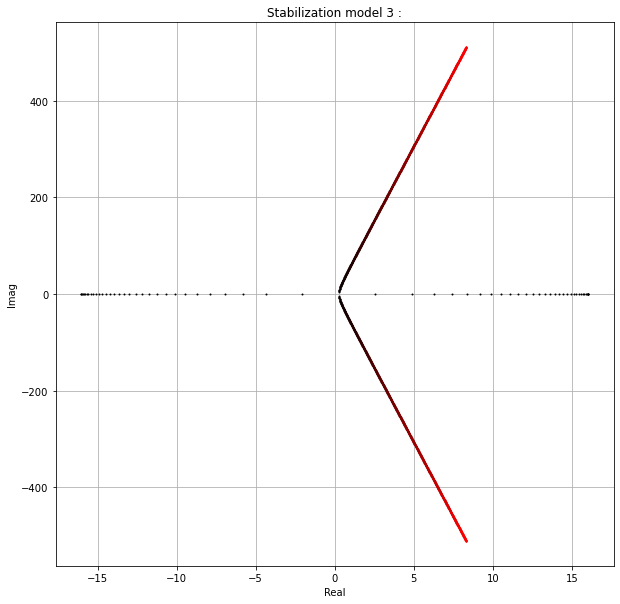

In [157]:
Vc = np.sqrt(b*g/np.tan(lamb));
#print(Vc);
V = np.arange(0,100,0.1);
plt.figure(figsize = (10, 10))
k2 = 1;
for i in range(len(V)):
    v = V[i];
    T3 = tf([1], [J, -D*v*k2/b, m*v**2*h*k2/b-m*g*h]);
    poles, zeros = control.pzmap(T3, plot=False)
    plt.plot(np.real(poles),np.imag(poles), marker='o', markersize=1, color=(i/len(V),0,0), ls='');
    plt.title('Stabilization model 3 :');
    plt.ylabel('Imag');
    plt.xlabel('Real');
    plt.grid(True);

## Linear fourth-order model

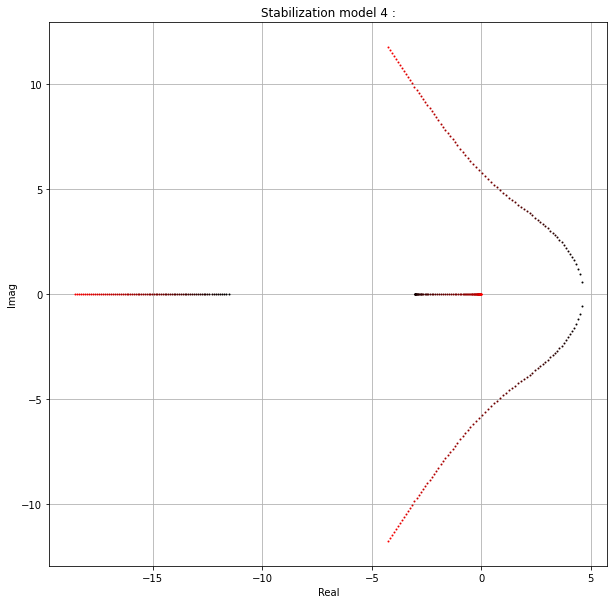

In [162]:
Vc = np.sqrt(b*g/np.tan(lamb));
#print(Vc);
V = np.arange(Vc+0.1,10,0.1);
#V = np.arange(6,100,0.1);
plt.figure(figsize = (10, 10))
for i in range(len(V)):
    v = V[i];
    T11 = tf([M[0,0], C[0,0]*v, K0[0,0]+K2[0,0]*v**2],[1]);
    T12 = tf([M[0,1], C[0,1]*v, K0[0,1]+K2[0,1]*v**2],[1]);
    T21 = tf([M[1,0], C[1,0]*v, K0[1,0]+K2[1,0]*v**2],[1]);
    T22 = tf([M[1,1], C[1,1]*v, K0[1,1]+K2[1,1]*v**2],[1]);
    T4 = 1/(T21 - T11*T22/T12);
    poles, zeros = control.pzmap(T4, plot=False)
    plt.plot(np.real(poles),np.imag(poles), marker='o', markersize=1, color=(i/len(V),0,0), ls='');
    plt.title('Stabilization model 4 :');
    plt.ylabel('Imag');
    plt.xlabel('Real');
    plt.grid(True);

# Part D - Maneuver scenario
## Simple second order model without a front fork

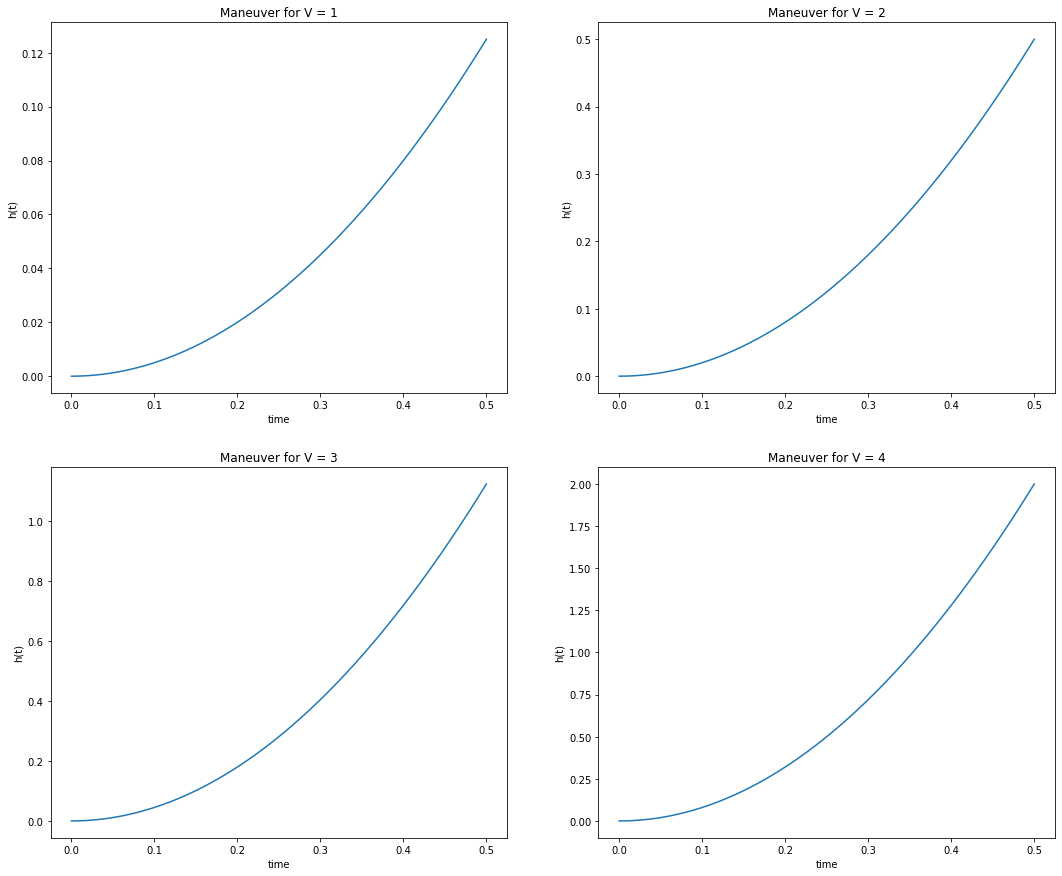

In [164]:
V = [1, 2, 3, 4];
plt.figure(figsize = (18, 15))
for i in range(len(V)):
    v = V[i];
    M1 = tf([v**2], [b, 0, 0]);
    [t, m1] = control.step_response(M1, T = np.linspace(0, .5, 1000))
    plt.subplot(2,2,i+1);
    plt.plot(t,m1);
    plt.title('Maneuver for V = ' + str(v));
    plt.ylabel('h(t)');
    plt.xlabel('time');

## Simple second order model with a front fork

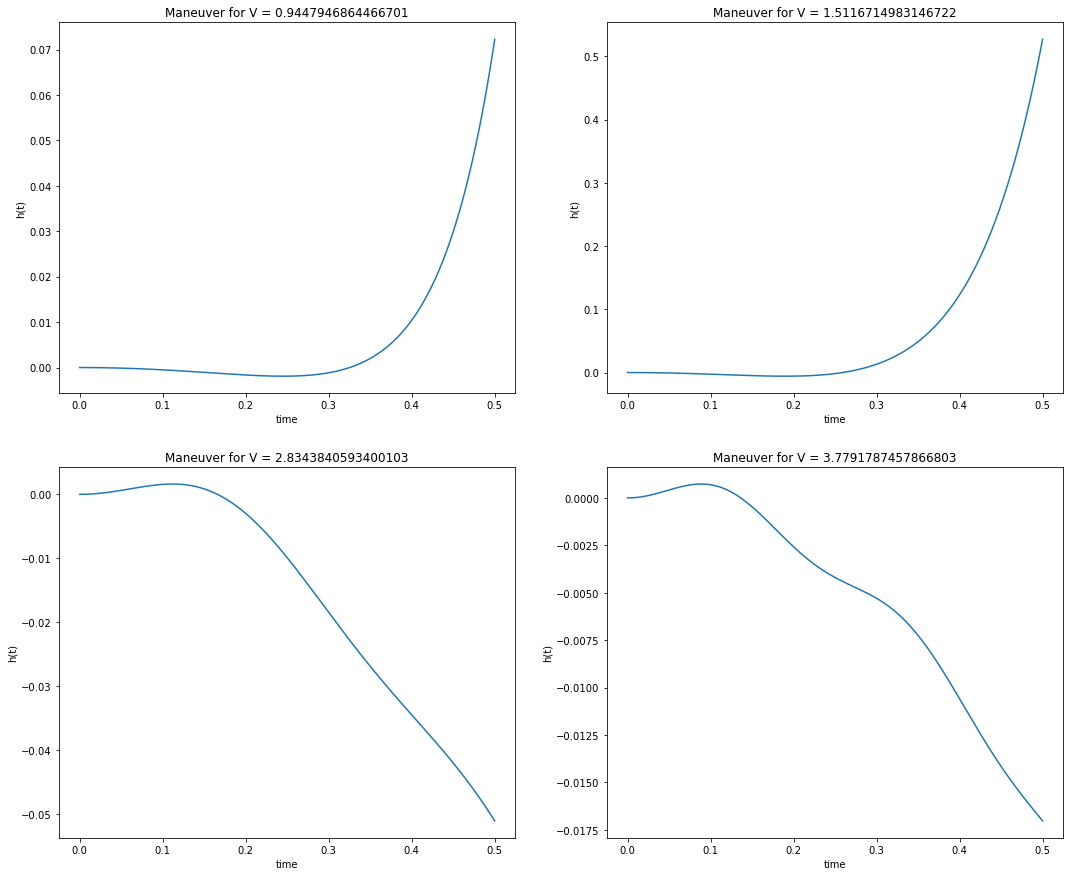

In [165]:
Vc = np.sqrt(b*g/np.tan(lamb));
V = [0.5*Vc, 0.8*Vc, 1.5*Vc, 2*Vc];
plt.figure(figsize = (18, 15))
for i in range(len(V)):
    v = V[i];
    k1 = b**2/(v**2*np.sin(lamb)-b*g*np.cos(lamb))/m/a/c/np.sin(lamb);
    k2 = b*g/(v**2*np.sin(lamb)-b*g*np.cos(lamb));
    M2 = tf([k1*v**2/b, 0, -k1*v**2/b*m*g*h/J], [1, k2*v*D/b/J, m*g*h/J*(v**2/Vc**2-1), 0, 0]);
    [t, m2] = control.step_response(M2, T = np.linspace(0, .5, 1000))
    plt.subplot(2,2,i+1);
    plt.plot(t,m2);
    plt.title('Maneuver for V = ' + str(v));
    plt.ylabel('h(t)');
    plt.xlabel('time');

## Bicycle with rear-wheel steering

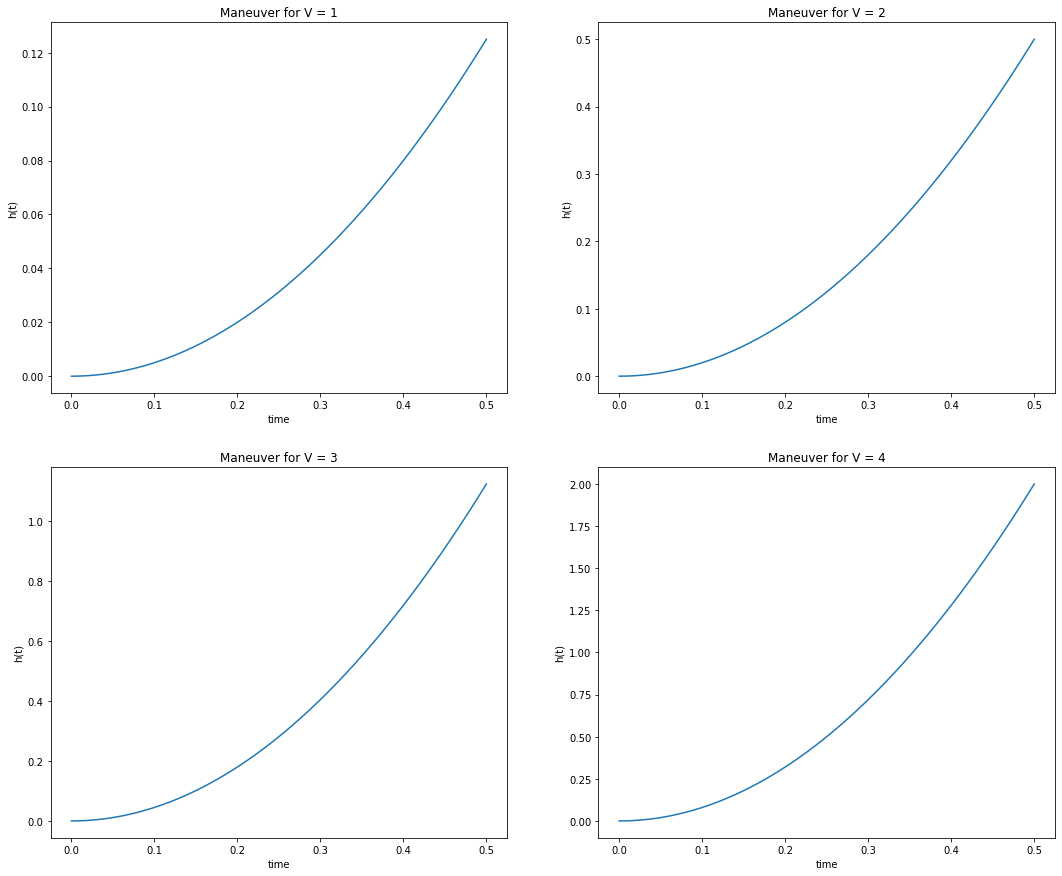

In [166]:
V = [1, 2, 3, 4];
plt.figure(figsize = (18, 15))
for i in range(len(V)):
    v = V[i];
    M3 = tf([v**2], [b, 0, 0]);
    [t, m3] = control.step_response(M3, T = np.linspace(0, .5, 1000))
    plt.subplot(2,2,i+1);
    plt.plot(t,m3);
    plt.title('Maneuver for V = ' + str(v));
    plt.ylabel('h(t)');
    plt.xlabel('time');

## Linear fourth-order model

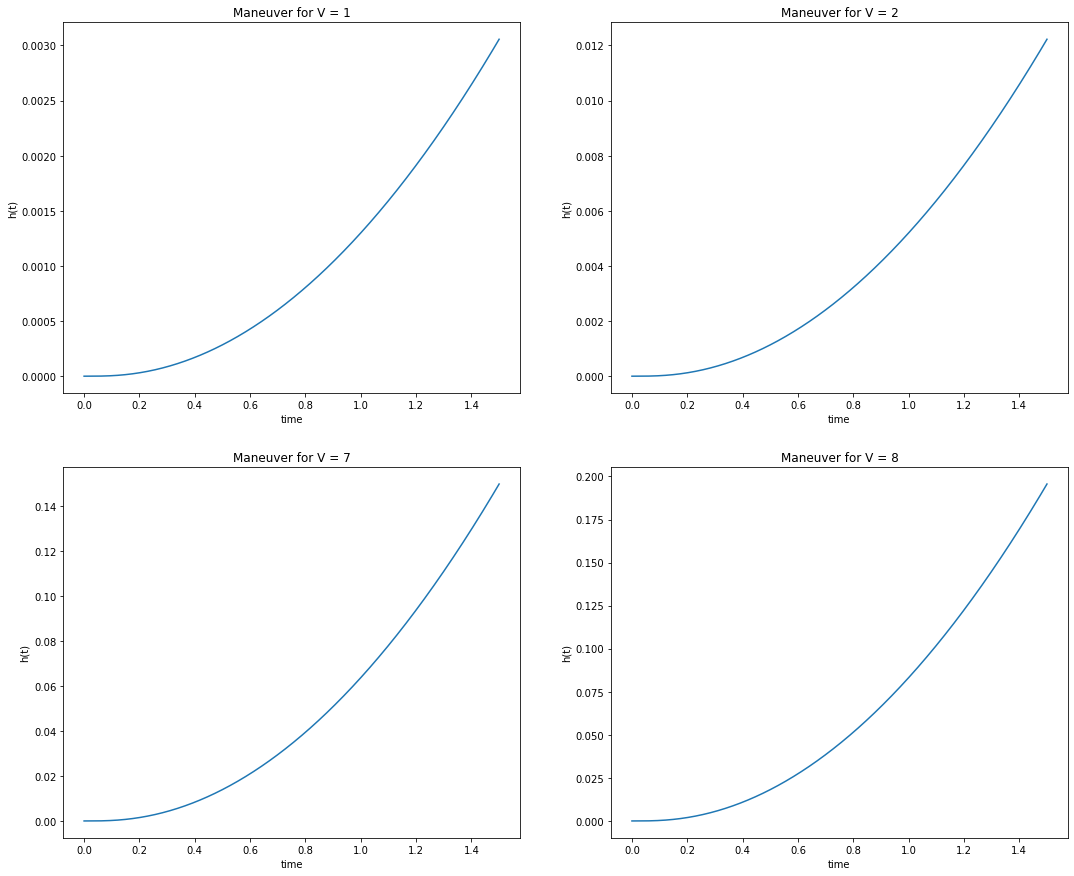

In [168]:
Vc = np.sqrt(b*g/np.tan(lamb));
V = [1, 2, 7, 8];
plt.figure(figsize = (18, 15))
for i in range(len(V)):
    v = V[i];
    M4 = tf([v**2], [b, 0, 0])/T22;
    [t, m4] = control.step_response(M4, T = np.linspace(0, 1.5, 1000))
    plt.subplot(2,2,i+1);
    plt.plot(t,m4);
    plt.title('Maneuver for V = ' + str(v));
    plt.ylabel('h(t)');
    plt.xlabel('time');

# Part E

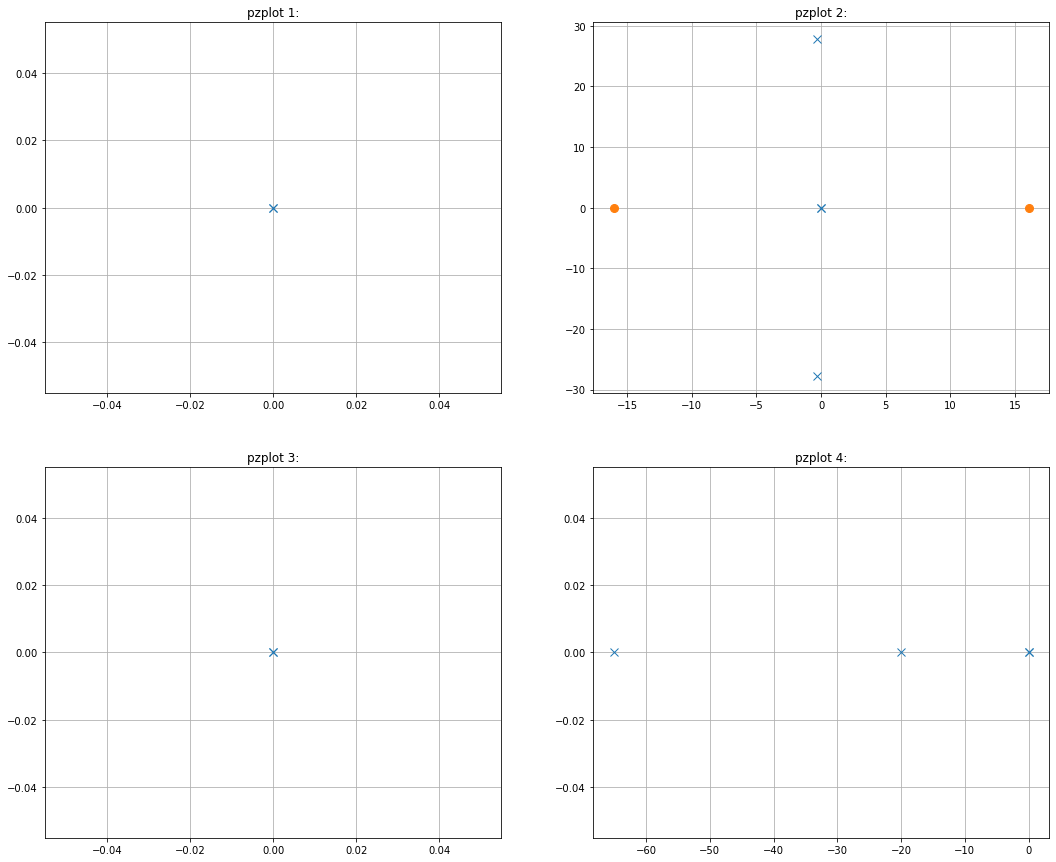

In [169]:
plt.figure(figsize = (18, 15))

plt.subplot(2,2,1)
poles, zeros = control.pzmap(M1, plot=False)
plt.plot(np.real(poles),np.imag(poles), marker='x', markersize=8, ls='');
plt.plot(np.real(zeros),np.imag(zeros), marker='o', markersize=8, ls='');
plt.title('pzplot 1:');
plt.grid(True);

plt.subplot(2,2,2)
poles, zeros = control.pzmap(M2, plot=False)
plt.plot(np.real(poles),np.imag(poles), marker='x', markersize=8, ls='');
plt.plot(np.real(zeros),np.imag(zeros), marker='o', markersize=8, ls='');
plt.title('pzplot 2:');
plt.grid(True);

plt.subplot(2,2,3)
poles, zeros = control.pzmap(M3, plot=False)
plt.plot(np.real(poles),np.imag(poles), marker='x', markersize=8, ls='');
plt.plot(np.real(zeros),np.imag(zeros), marker='o', markersize=8, ls='');
plt.title('pzplot 3:');
plt.grid(True);

plt.subplot(2,2,4)
poles, zeros = control.pzmap(M4, plot=False)
plt.plot(np.real(poles),np.imag(poles), marker='x', markersize=8, ls='');
plt.plot(np.real(zeros),np.imag(zeros), marker='o', markersize=8, ls='');
plt.title('pzplot 4:');
plt.grid(True);


# Part F

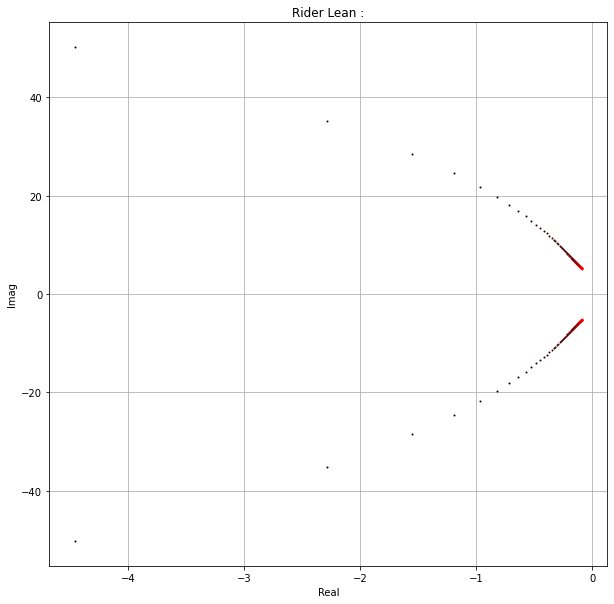

In [172]:
Vc = np.sqrt(b*g/np.tan(lamb));
V = np.arange(Vc+0.1,10,0.1);
#V = np.arange(0,10,0.1);
plt.figure(figsize = (10, 10))
for i in range(len(V)):
    v = V[i];
    k1 = b**2/(v**2*np.sin(lamb)-b*g*np.cos(lamb))/m/a/c/np.sin(lamb);
    k2 = b*g/(v**2*np.sin(lamb)-b*g*np.cos(lamb));
    G_lean = tf([-J, 0, m*g*h],[J, D*v*k2/b, m*v**2*h*k2/b-m*g*h]);# T = 0
    poles, zeros = control.pzmap(G_lean, plot=False)
    plt.plot(np.real(poles),np.imag(poles), marker='o', markersize=1, color=(i/len(V),0,0), ls='');
    plt.title('Rider Lean :');
    plt.ylabel('Imag');
    plt.xlabel('Real');
    plt.grid(True);

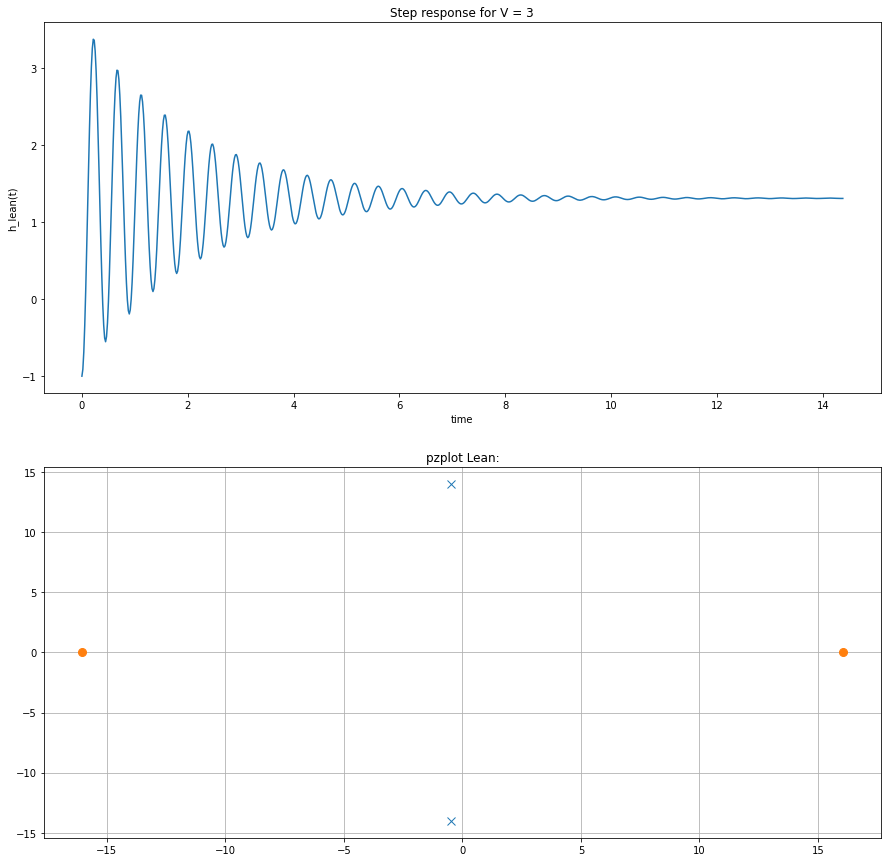

In [173]:
v = 3;# more than Vc to be stable
k1 = b**2/(v**2*np.sin(lamb)-b*g*np.cos(lamb))/m/a/c/np.sin(lamb);
k2 = b*g/(v**2*np.sin(lamb)-b*g*np.cos(lamb));
G_lean = tf([-J, 0, m*g*h],[J, D*v*k2/b, m*v**2*h*k2/b-m*g*h]);# T = 0
[t, h_lean] = control.step_response(G_lean)

plt.figure(figsize = (15, 15))
plt.subplot(2,1,1);
plt.plot(t,h_lean);
plt.title('Step response for V = 3');
plt.ylabel('h_lean(t)');
plt.xlabel('time');

plt.subplot(2,1,2);
poles, zeros = control.pzmap(G_lean, plot=False)
plt.plot(np.real(poles),np.imag(poles), marker='x', markersize=8, ls='');
plt.plot(np.real(zeros),np.imag(zeros), marker='o', markersize=8, ls='');
plt.title('pzplot Lean:');
plt.grid(True);